## EC7212 – Computer Vision and Image Processing 

### Importing necessary libraries

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import requests
from PIL import Image, ImageDraw
from io import BytesIO

### Function to load the image from URL

In [3]:
def load_image_from_url(url, to_gray=False):
    try:
        response = requests.get(url, timeout=10)
        response.raise_for_status()
        img = Image.open(BytesIO(response.content))
        return np.array(img.convert('L' if to_gray else 'RGB'))
    except Exception as e:
        print(f"Error loading image: {e}")
        return np.full((512, 512, 3), (128,) * (1 if to_gray else 3), dtype=np.uint8)

### Tasks

### Task 1 - Reduce Intensity Levels


In [4]:
def reduce_intensity(image, num_levels):
    step = 256 / num_levels
    return (np.floor(image / step) * step).astype(np.uint8)

def task1():
    img = load_image_from_url(URL, to_gray=True)
    levels = 4  
    reduced = reduce_intensity(img.copy(), levels)
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(img, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')
    plt.subplot(1, 2, 2)
    plt.imshow(reduced, cmap='gray')
    plt.title(f'{levels} Intensity Levels')
    plt.axis('off')
    plt.suptitle('Task 1 - Intensity Level Reduction')
    plt.show()

### Task 2 - Spatial Averaging 


In [5]:
def spatial_average(image, kernel_size):
    return cv2.blur(image, (kernel_size, kernel_size))

def task2():
    img = load_image_from_url(URL)
    kernels = [3, 10, 20]
    results = [spatial_average(img.copy(), k) for k in kernels]
    titles = ['Original', '3x3 Avg', '10x10 Avg', '20x20 Avg']
    plt.figure(figsize=(20, 5))
    plt.subplot(1, 4, 1)
    plt.imshow(img)
    plt.title(titles[0])
    plt.axis('off')
    for i in range(3):
        plt.subplot(1, 4, i + 2)
        plt.imshow(results[i])
        plt.title(titles[i + 1])
        plt.axis('off')
    plt.suptitle('Task 2 - Spatial Averaging')
    plt.show()

### Task 3 - Rotate Image


In [6]:
def rotate_image(image, angle):
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    matrix = cv2.getRotationMatrix2D(center, angle, 1.0)
    return cv2.warpAffine(image, matrix, (w, h))

def task3():
    img = load_image_from_url(URL)
    angles = [45, 90]
    rotated = [rotate_image(img.copy(), a) for a in angles]
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 3, 1)
    plt.imshow(img)
    plt.title('Original')
    plt.axis('off')
    for i in range(2):
        plt.subplot(1, 3, i + 2)
        plt.imshow(rotated[i])
        plt.title(f'Rotated {angles[i]}°')
        plt.axis('off')
    plt.suptitle('Task 3 - Image Rotation')
    plt.show()

### Task 4 - Block Based Resolution Reduction


In [7]:
def reduce_resolution_by_averaging(image, block_size):
    output = image.copy()
    h, w = image.shape[:2]
    for y in range(0, h, block_size):
        for x in range(0, w, block_size):
            y_end, x_end = min(y + block_size, h), min(x + block_size, w)
            block = image[y:y_end, x:x_end]
            avg = np.mean(block, axis=(0, 1), dtype=int) if len(block.shape) == 3 else np.mean(block, dtype=int)
            output[y:y_end, x:x_end] = avg
    return output

def task4():
    img = load_image_from_url(URL)
    sizes = [3, 5, 7]
    results = [reduce_resolution_by_averaging(img.copy(), s) for s in sizes]
    titles = ['Original', '3x3 Blocks', '5x5 Blocks', '7x7 Blocks']
    plt.figure(figsize=(20, 5))
    plt.subplot(1, 4, 1)
    plt.imshow(img)
    plt.title(titles[0])
    plt.axis('off')
    for i in range(3):
        plt.subplot(1, 4, i + 2)
        plt.imshow(results[i])
        plt.title(titles[i + 1])
        plt.axis('off')
    plt.suptitle('Task 4 - Resolution Reduction')
    plt.show()

### Image URL and run all four tasks 


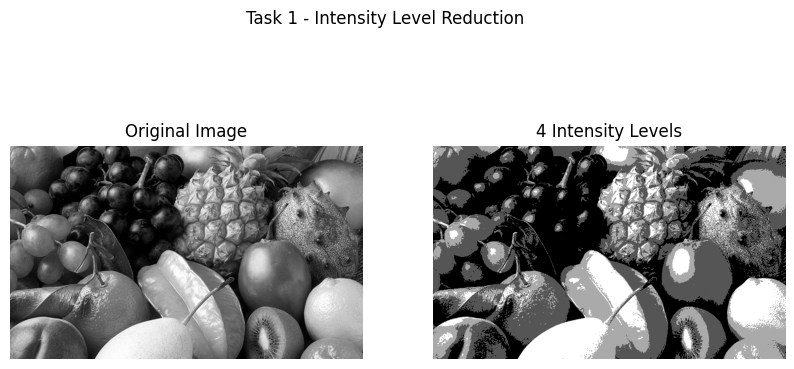

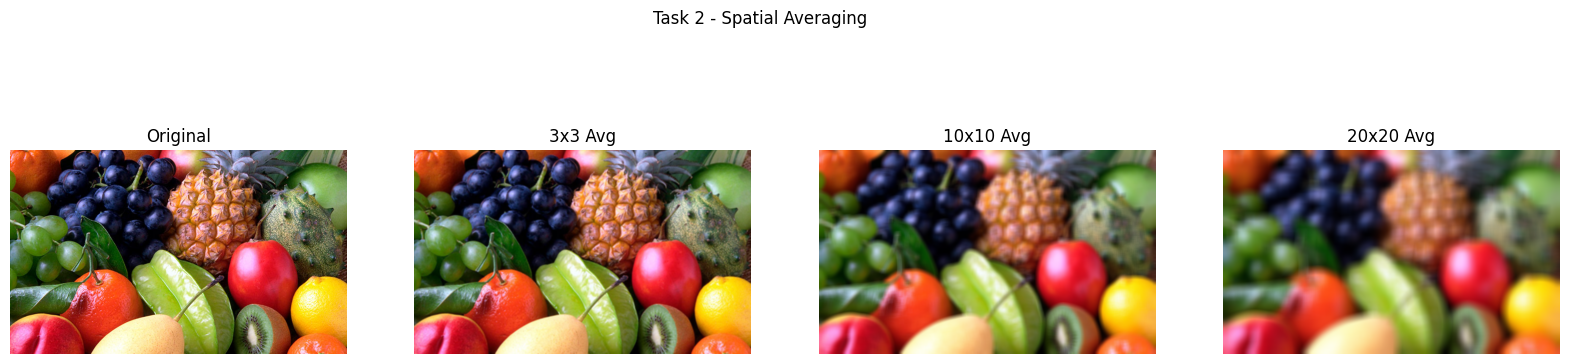

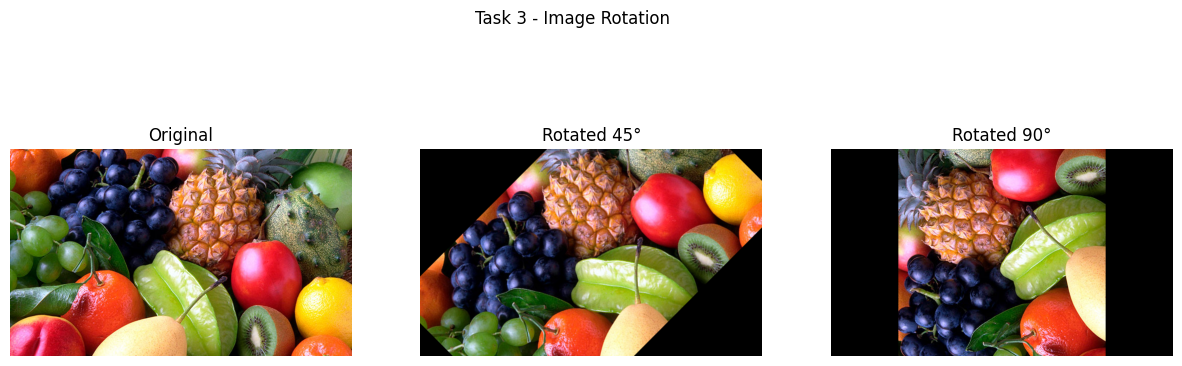

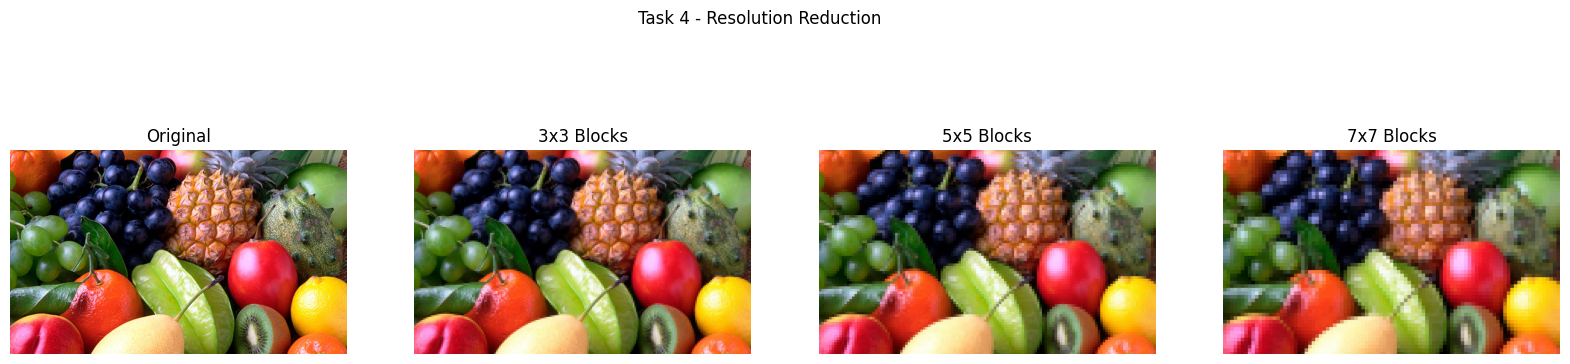

In [8]:
URL = "https://www.theplayatimes.com/wp-content/uploads/2017/12/fruits-82524-rgb.jpg"

task1()
task2()
task3()
task4()